Saving audi.jpg to audi.jpg


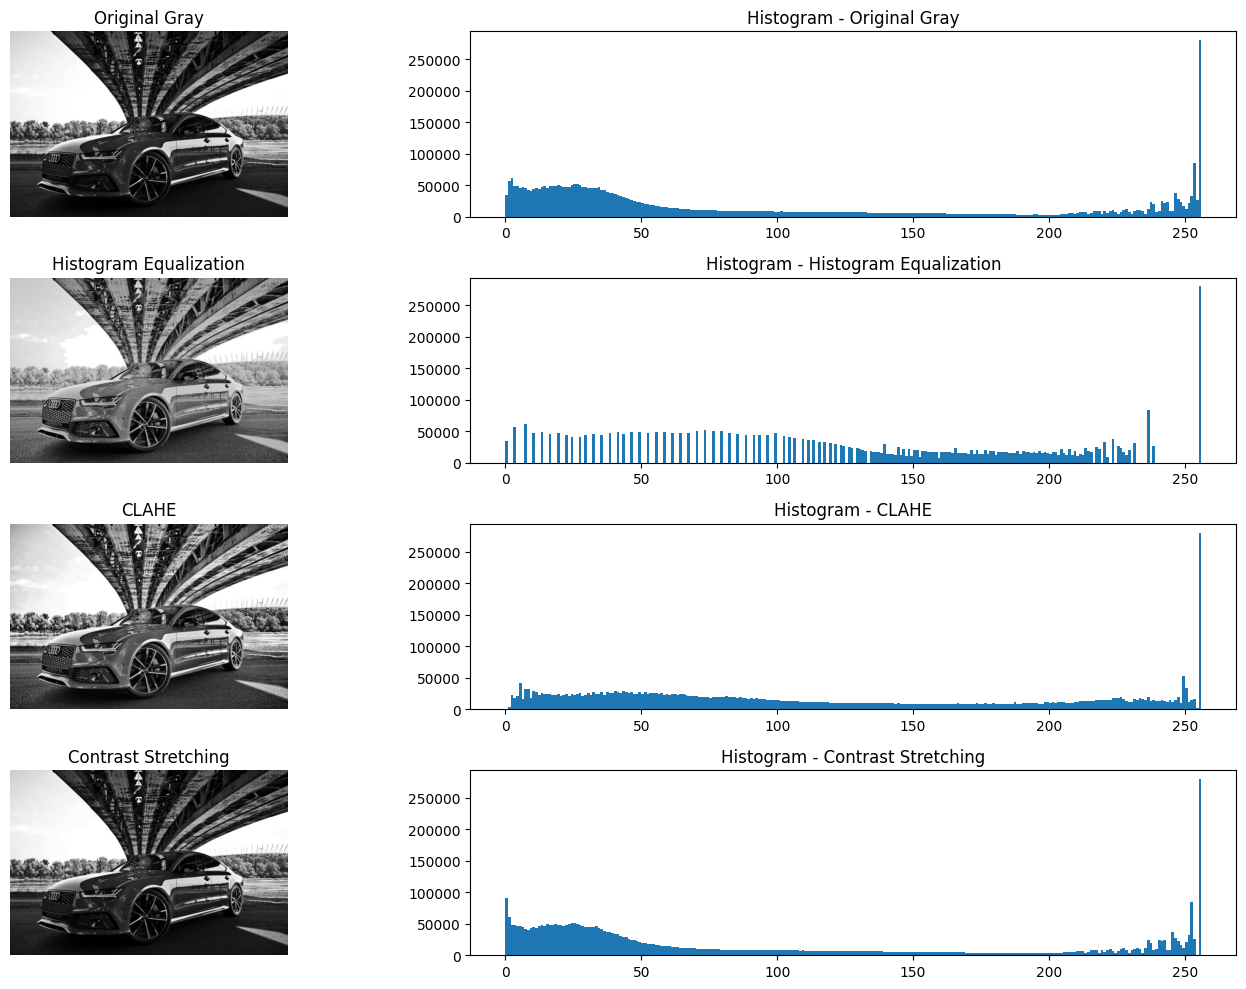

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    img_path = fn

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist_eq = cv2.equalizeHist(img_gray)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img_gray)

def contrast_stretching(image):
    in_min = np.percentile(image, 2)
    in_max = np.percentile(image, 98)
    out_min, out_max = 0, 255
    stretched = (image - in_min) * ((out_max - out_min) / (in_max - in_min)) + out_min
    stretched = np.clip(stretched, 0, 255).astype(np.uint8)
    return stretched

contrast_stretched = contrast_stretching(img_gray)

titles = ["Original Gray", "Histogram Equalization", "CLAHE", "Contrast Stretching"]
images = [img_gray, hist_eq, clahe_img, contrast_stretched]

plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(4,2,2*i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

    plt.subplot(4,2,2*i+2)
    plt.hist(images[i].ravel(), bins=256, range=(0,256))
    plt.title(f"Histogram - {titles[i]}")

plt.tight_layout()
plt.show()
